In [5]:
#import packages 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os


In [9]:
# define file paths 
# Format data from model run
onedrive_file_path = "/Users/sophieayling/Library/CloudStorage/OneDrive-UniversityCollegeLondon/GitHub/Disease-Modelling-SSA/data/output/ICCS/extended_submission/ver_3 (multiDist)/50_perc/beta_0.3/output/"
plot_output_path= "/Users/sophieayling/Library/CloudStorage/OneDrive-UniversityCollegeLondon/GitHub/Disease-Modelling-SSA/data/output/ICCS/extended_submission/plots/"


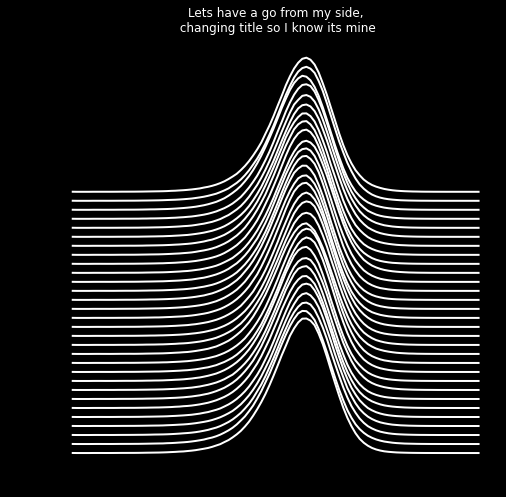

In [14]:

# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)
# Generate epidemic curves from different runs
# Create a list to store the number of cases in
lines = []
# Iterate over each output file
for file in os.listdir(onedrive_file_path):
    # load the data
    data = pd.read_csv(onedrive_file_path + file, delimiter='\t')
    # drop the column that is normally there
    data = data.drop('Unnamed: 10', axis=1)
    # Calculate the total number of cases in all districts at each point in time
    data = data.groupby('time').sum()
    # Calculate the total new cases (both symptomatic and asymptomatic)
    data['new_cases'] = data['metric_new_cases_asympt'] + data['metric_new_cases_sympt']
    # Store this in lines
    lines.append(list(data['new_cases']))

# Generate line plots, iterate over number of runs
for i in range(len(os.listdir(onedrive_file_path))):
    # We need something to push the lines up on the plot, otherwise each line will be plotted on top of one another and
    # it will look messy, create this y-axis offset (this is just made up and will be individual to the graph, but works
    # for this graph at least
    y_offset = i * max([max(j) for j in lines]) / len(os.listdir(onedrive_file_path)) * 2
    # Plot the line
    ax.plot(np.arange(len(lines[i])), np.add(y_offset, lines[i]), color="w", lw=2)

plt.title('Lets have a go from my side,\n changing title so I know its mine', color='w')
# save output 
plt.savefig(plot_output_path+'joy_division_example.png')
# plt.show()
# plt.clf()



<Figure size 432x288 with 0 Axes>